# Visualising Retail Transaction

> * A retail chain operating across multiple cities in India wants to improve its decision-making by analysing customer purchase behaviour. The company has recently expanded into Tier-2 and Tier-3 cities and is experiencing challenges in understanding customer preferences, seasonal demand, and city-level sales performance. The raw transactional data from their stores is messy, incomplete, and inconsistent, making it difficult for business analysts to directly use it for insights.
> * The company's AI team has approached you (the participants) to preprocess the data, clean it, and visualize key patterns that can help management make better marketing and inventory decisions.

> ### **Step 1 :** Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> ### **Step 2 :**  Load the dataset

In [2]:
data = pd.read_csv("Retail_Transactions_2000.csv")
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,3/15/2023,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,1/22/2023,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,4/18/2023,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,8/9/2023,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,9/23/2023,Wallet,3123


In [3]:
data.shape

(2000, 11)

> ### **Step 3 :**  Check the null and duplicate values 

In [4]:
data.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [6]:
data.duplicated().sum()

np.int64(0)

* As the dataset has no null or duplicate values so I proceed further

> ### **Step 4 :**  Split the date column into separate day, month, and year columns 

In [7]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

In [8]:
data['Year'] = data['PurchaseDate'].dt.year
data['Month'] = data['PurchaseDate'].dt.month
data['Day'] = data['PurchaseDate'].dt.day

In [9]:
data

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,Month,Day
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,3,15
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,1,22
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,4,18
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,8,9
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,9,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872,2023,1,15
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232,2023,1,14
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246,2023,6,19
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418,2023,1,15


> ### **Step 5 :** Grouped the age 

In [10]:
bins = [18, 25, 40, 60, 200]         
labels = ['18-25', '26-40', '41-60', '60+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)     

In [11]:
data

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,Month,Day,Age_Group
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,3,15,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,1,22,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,4,18,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,8,9,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,9,23,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872,2023,1,15,41-60
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232,2023,1,14,41-60
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246,2023,6,19,41-60
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418,2023,1,15,41-60


 ## **Task 1 :** Customers Demographics
> * Age Distribution of Customers
> * Gender Distribution of Customers
> * Top 10 Cities by Number of Customers

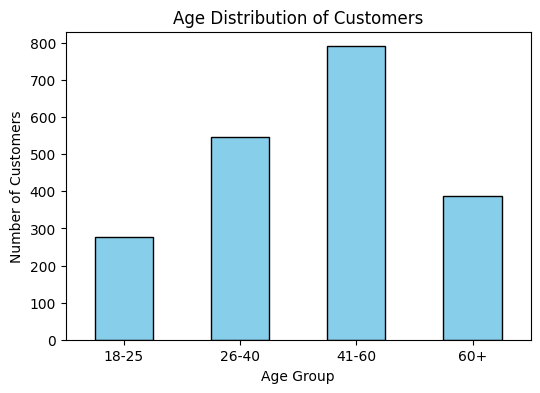

In [12]:
bins = [0, 25, 40, 60, 120]
labels = ['18-25', '26-40', '41-60', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(6,4))
data['AgeGroup'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.savefig('Age Distribution of Customers.png')
plt.show()

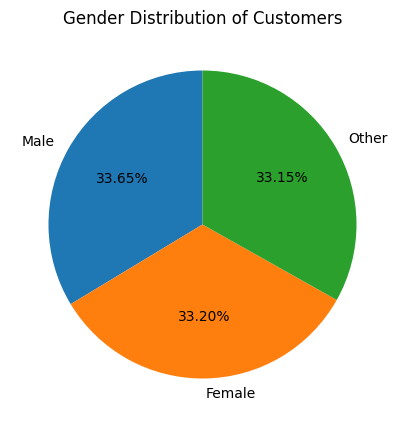

In [13]:
plt.figure(figsize=(5,5))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title("Gender Distribution of Customers")
plt.ylabel("")
plt.savefig('Gender Distribution of Customers.png')
plt.show()

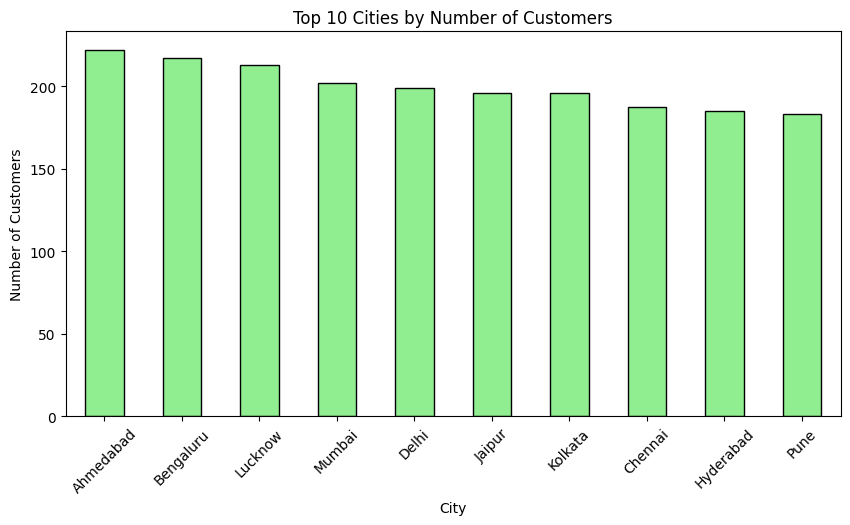

In [14]:
plt.figure(figsize=(10,5))
data['City'].value_counts().head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.savefig('Top 10 Cities by Number of Customers.png')
plt.show()

 ## **Task 2 :** Sales Insights
> * Total sales by product category
> * Payment mode usage

C:\Users\AYAN NANDI\AppData\Local\Temp\ipykernel_30692\3516110015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


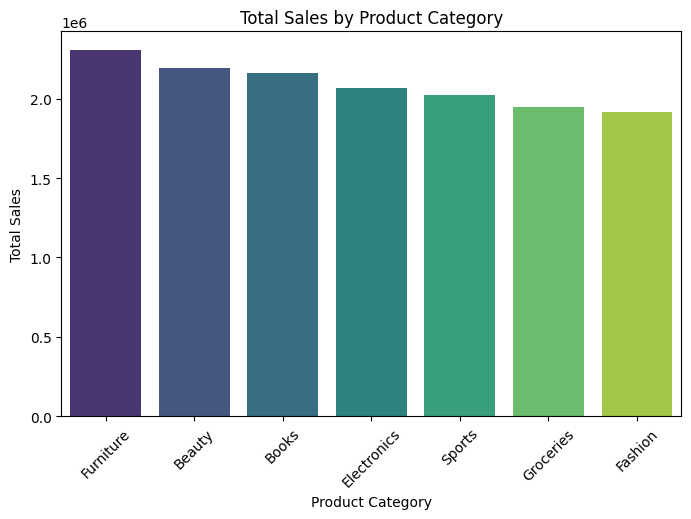

In [15]:
plt.figure(figsize=(8,5))
category_sales = data.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.savefig('Total Sales by Product Category.png')
plt.show()

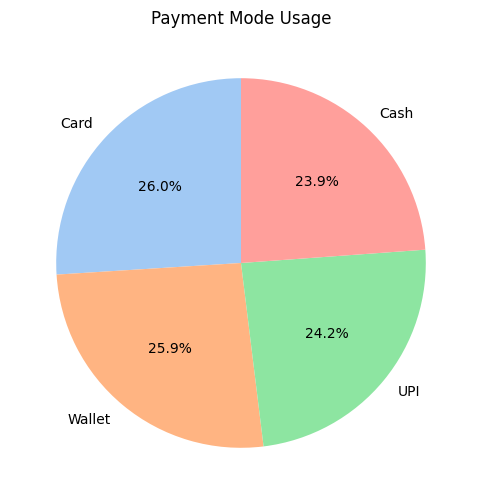

In [16]:
plt.figure(figsize=(6,6))
data['PaymentMode'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,colors=sns.color_palette("pastel"))
plt.title("Payment Mode Usage")
plt.ylabel("")
plt.savefig('Payment Mode Usage.png')
plt.show()

 ## **Task 3 :** Advanced Insights
> * Average spend per customer
> * Citywise revenue contribution
> * Product category vs payment method

C:\Users\AYAN NANDI\AppData\Local\Temp\ipykernel_30692\3615013735.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_age = data.groupby('AgeGroup')['TotalAmount'].mean().reset_index()
C:\Users\AYAN NANDI\AppData\Local\Temp\ipykernel_30692\3615013735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='TotalAmount', data=avg_spend_age, palette='coolwarm')


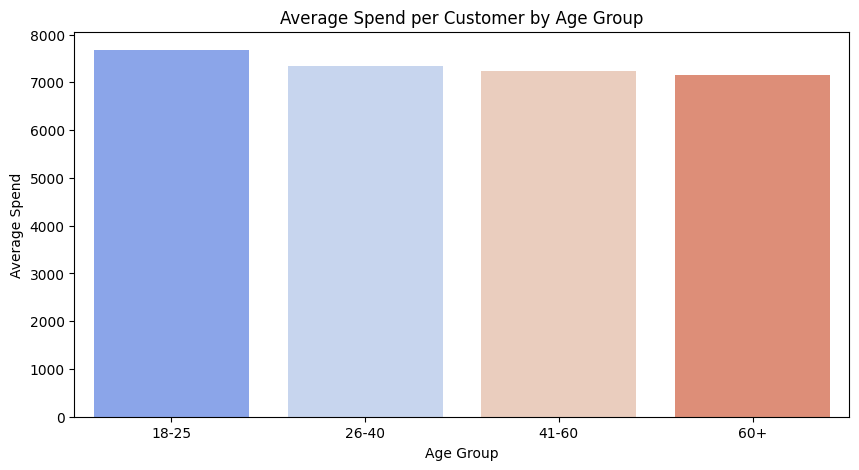

In [17]:
bins = [0, 25, 40, 60, 120]
labels = ['18-25', '26-40', '41-60', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)
avg_spend_age = data.groupby('AgeGroup')['TotalAmount'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='AgeGroup', y='TotalAmount', data=avg_spend_age, palette='coolwarm')
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spend")
plt.savefig('Average Spend per Customer by Age Group.png')
plt.show()

C:\Users\AYAN NANDI\AppData\Local\Temp\ipykernel_30692\983274169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue.index, y=city_revenue.values, palette='magma')


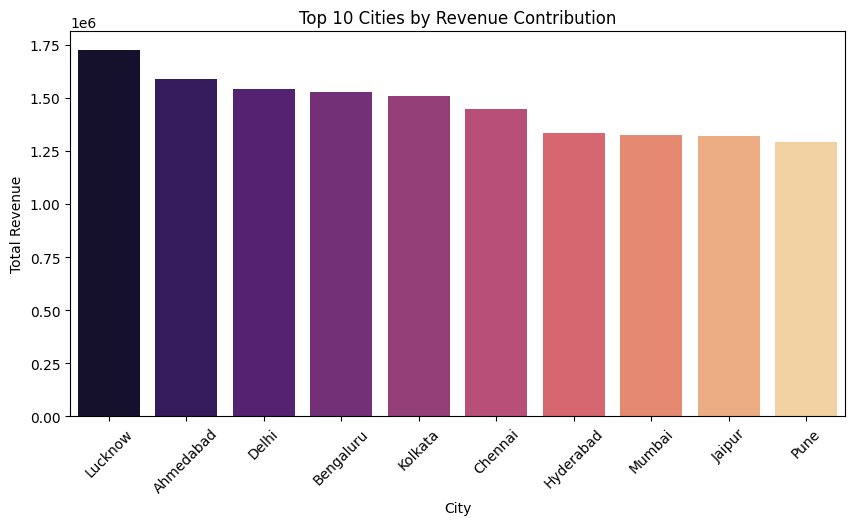

In [18]:
city_revenue =data.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=city_revenue.index, y=city_revenue.values, palette='magma')
plt.title("Top 10 Cities by Revenue Contribution")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.savefig('Top 10 Cities by Revenue Contribution.png')
plt.show()

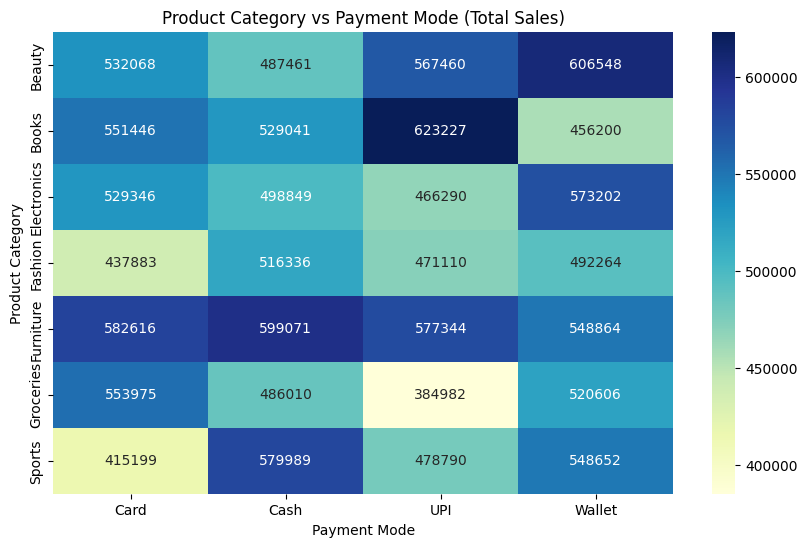

In [19]:
heatmap_data = data.pivot_table(index='ProductCategory', columns='PaymentMode', values='TotalAmount', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Product Category vs Payment Mode (Total Sales)")
plt.xlabel("Payment Mode")
plt.ylabel("Product Category")
plt.savefig('Product Category vs Payment Mode (Total Sales).png')
plt.show()